<a href="https://colab.research.google.com/github/mohamedbakrey12/Advanced-Data-Science/blob/master/Apply_Machine_Learning_Models_for_Author's_Stance_using_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
   In this project I work for classification model for Author's Stance using Tweets

### Project Pipeline

1. Loading the library
2. Loading Dataset
3. Data pre-Processing
4. Applying the Model Machine Learning
     1. Applying Logistic Regression
     2. Applying Random Forest Classifier
     3. Applying Decision Tree

# 1. Loading Library

In [ ]:
# Using this for working with dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


# Spliting the data
from sklearn.model_selection import train_test_split


# Using this library for transform the data into numeric
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Modeling machine learning
from sklearn.linear_model import LogisticRegression


# For Metrics, to check the model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

# Saving the Model
import pickle
# loading the model
from keras.models import load_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Read the dataset

In [ ]:
# Here read the read the data by using pandas li')
# Show the first 10 rows
df=pd.read_csv('/content/train.csv')
df.head(10)

,id,text,target,stance,sarcasm,sentiment,datetime
0,0,ما أرآه ولله الحمد من تمكين للمرأة يدل على أ...,Women empowerment,Favor,No,Positive,2021-04-22 17:07:51+00:00
1,1,انا لو يخيروني اخذ التطعيم عشان اسافر ولا اتم ...,Covid Vaccine,Against,No,Neutral,2020-12-10 19:19:24+00:00
2,2,MENTION تطعيم لكل الناس لمرض نسبة الشفاء منه ٩...,Covid Vaccine,Against,No,Negative,2021-06-01 11:32:31+00:00
3,3,"""المملكة جادة جدا في دعم ملف تمكين المرأة"".. و...",Women empowerment,Favor,No,Neutral,2021-01-16 07:35:18+00:00
4,4,اقسم الله اللي يصير يضيق الصدر.. معقولة كثير ...,Women empowerment,Against,No,Negative,2020-12-17 07:18:31+00:00
5,5,يسلمك ربي من كل شر يا بو يعقوب 🌷 هذا اللي أخذ...,Covid Vaccine,None,No,Neutral,2021-12-12 06:47:32+00:00
6,6,#نساء_المستقبل | نبارك لسعادة الدكتورة #تهاني_...,Women empowerment,Favor,No,Positive,2021-10-02 13:53:44+00:00
7,7,تسعى حكومتنا-حفظها الله- إلى تمكين المرأة من ا...,Women empowerment,Favor,No,Positive,2022-01-21 10:46:44+00:00
8,8,سبحان الله ☝️ اخس البقر يتكلمون انتي ي حثله ال...,Women empowerment,Against,No,Negative,2021-02-15 10:53:27+00:00
9,9,عادي اتذكر كنا في مركز تطعيم كورونا قبل سنه و...,Covid Vaccine,Favor,No,Neutral,2022-04-15 13:42:23+00:00


###  Check the data

In [ ]:
# Drop Null value
df.dropna(inplace=True)

In [ ]:
# Check the nulls values and after clean the null value
df.isna().sum()

id           0
text         0
target       0
stance       0
sarcasm      0
sentiment    0
datetime     0
dtype: int64

In [ ]:
# check the information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2801 non-null   int64 
 1   text       2801 non-null   object
 2   target     2801 non-null   object
 3   stance     2801 non-null   object
 4   sarcasm    2801 non-null   object
 5   sentiment  2801 non-null   object
 6   datetime   2801 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.3+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

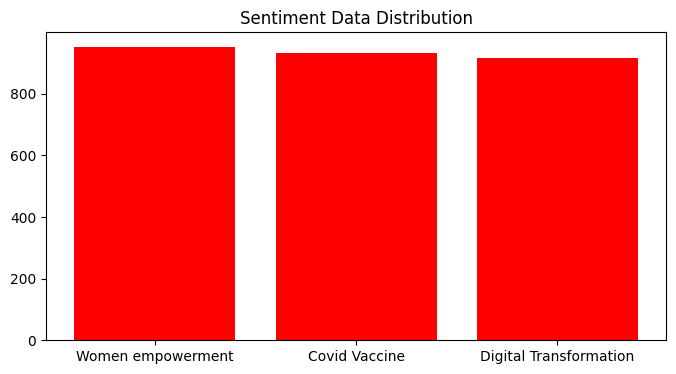

In [ ]:
# Check the label for the data
val_count = df.target.value_counts()
# Figure size
plt.figure(figsize=(8,4))
# Using Bar plot to ploting the count of labeling data.
plt.bar(val_count.index, val_count.values, color='red')
# Set title for the plot.
plt.title("Sentiment Data Distribution")

# 3. Data Pre-processing

In [ ]:
"""
This function for processing the data,
here check the stopwords .
"""
def preprocess(text):
    text = text.split()
    # Check the stopwords.
    stop = set(stopwords.words('arabic'))

    return " ".join(text)


# Apply the function for the data.
df['text'] = df['text'].apply(preprocess)

In [ ]:
# Clean the Emoji from our dataset
!pip install emoji
import emoji

df['text'] = df['text'].apply(lambda s: emoji.replace_emoji(s, ''))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Check the data after make processing on it.
df['text']

0       ما أرآه ولله الحمد من تمكين للمرأة يدل على أن ...
1       انا لو يخيروني اخذ التطعيم عشان اسافر ولا اتم ...
2       MENTION تطعيم لكل الناس لمرض نسبة الشفاء منه ٩...
3       "المملكة جادة جدا في دعم ملف تمكين المرأة".. و...
4       اقسم الله اللي يصير يضيق الصدر.. معقولة كثير م...
                              ...                        
2796    خطوة ممتازة من المجلس ونرجوا المزيد من التقدم ...
2797     مـﻧـــ الخاصــ  تطعيم كورونا في جامعة الملك ع...
2798    " تمكين المرأة هو حاجة ومطلب رئيسي سيغير في مج...
2799    #خذ_الخطوه_بلغ_عن_اضرار_اللقاح #لا_للتطعيم_الا...
2800    العلماء يجلسو سنين عشان يطلعو دواء او تطعيم عش...
Name: text, Length: 2801, dtype: object

# 4. Apply the Tokenization on the data.
* Here we work on make transformation on the data to convert the data from text to numeric to make the model understand it.

In [ ]:
# Apply the tf-idf on the data.
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['text'] )
print(vectors[:10])

  (0, 212)	0.24082646905909053
  (0, 3239)	0.21406253624663066
  (0, 19313)	0.16076928229698567
  (0, 15231)	0.22058033546379818
  (0, 5167)	0.22058033546379818
  (0, 7729)	0.24082646905909053
  (0, 10641)	0.24082646905909053
  (0, 5103)	0.06963878456489231
  (0, 8007)	0.21406253624663066
  (0, 4679)	0.2003342018685058
  (0, 16901)	0.21406253624663066
  (0, 7497)	0.2289832401212537
  (0, 12674)	0.24082646905909053
  (0, 860)	0.24082646905909053
  (0, 8833)	0.2289832401212537
  (0, 3124)	0.23430493367409794
  (0, 2150)	0.2003342018685058
  (0, 747)	0.10675552324742783
  (0, 11907)	0.07069796502694307
  (0, 20642)	0.2003342018685058
  (0, 14154)	0.14510435990808856
  (0, 8834)	0.06398237117191273
  (0, 15828)	0.10834790311259941
  (0, 3415)	0.1345762275235012
  (0, 19545)	0.16076928229698567
  :	:
  (9, 14522)	0.21116441551477597
  (9, 12917)	0.1756594896336015
  (9, 11254)	0.21116441551477597
  (9, 13918)	0.1613269512998732
  (9, 1372)	0.18302742745850317
  (9, 1202)	0.21116441551477597

#### Convert the target columns from the text to numeric by using Label Encoding

In [ ]:
df.target

0            Women empowerment
1                Covid Vaccine
2                Covid Vaccine
3            Women empowerment
4            Women empowerment
                 ...          
2796    Digital Transformation
2797             Covid Vaccine
2798         Women empowerment
2799             Covid Vaccine
2800             Covid Vaccine
Name: target, Length: 2801, dtype: object

In [ ]:
label=df['target']
label

0            Women empowerment
1                Covid Vaccine
2                Covid Vaccine
3            Women empowerment
4            Women empowerment
                 ...          
2796    Digital Transformation
2797             Covid Vaccine
2798         Women empowerment
2799             Covid Vaccine
2800             Covid Vaccine
Name: target, Length: 2801, dtype: object

#### Spliting the data into train and test to use it to train the model.

### label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
target=label.fit_transform(df.target)

In [ ]:
target

array([2, 0, 0, ..., 2, 0, 0])

In [ ]:
# here apply the train_test-split function on the data.
X_train, X_test, y_train, y_test = train_test_split(vectors, target, test_size=0.2, random_state=42)

In [ ]:
print("Shape of the Train data set: ",X_train.shape)
print("Shape of the test data set:",X_test.shape)
print("Shape of the y_train data set",y_train.shape)
print("Shape of the y_test data set",y_test.shape)

Shape of the Train data set:  (2240, 21340)
Shape of the test data set: (561, 21340)
Shape of the y_train data set (2240,)
Shape of the y_test data set (561,)


# 5. Apply Model Machine Learning.

### Using Logistic Regression.

In [ ]:
# making LogisticRegression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
print('LogisticRegression Train Score is : ' , classifier.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , classifier.score(X_test, y_test))

LogisticRegression Train Score is :  1.0
LogisticRegression Test Score is :  0.9964349376114082


##### Ckeck the model predicton

In [ ]:
#making predictions on test data
y_predict = classifier.predict(X_test)
print(y_predict)

[1 1 1 2 2 0 2 0 0 2 1 1 0 0 1 1 2 0 2 1 1 0 1 2 0 0 2 0 2 0 2 0 2 0 2 0 0
 2 2 2 1 1 0 2 1 2 0 2 0 1 2 2 1 2 1 1 0 2 1 1 1 2 1 1 0 0 0 1 0 1 0 2 2 0
 0 0 2 1 1 2 1 0 2 2 1 2 1 0 1 0 1 2 2 2 1 2 0 0 1 2 0 0 1 0 1 2 1 1 1 1 0
 1 2 2 1 1 0 2 0 0 1 0 2 2 2 1 1 0 1 1 1 0 1 1 0 1 2 0 0 1 2 1 1 0 1 1 0 2
 0 2 2 0 0 2 2 0 1 0 2 1 2 2 1 0 1 2 0 1 0 1 1 0 0 0 0 1 1 0 0 2 2 1 2 0 1
 2 1 1 1 0 1 0 2 1 1 2 1 2 2 0 2 0 2 2 2 1 0 1 0 2 1 0 2 0 0 1 2 1 0 1 2 2
 2 2 1 1 1 2 2 1 0 1 1 0 0 2 2 0 1 0 0 0 0 1 2 2 1 2 0 2 1 1 2 1 2 0 1 1 1
 1 0 0 0 1 2 1 0 2 0 0 1 1 1 1 1 0 0 2 0 2 1 0 0 2 2 2 1 2 0 1 1 0 1 0 1 0
 1 1 2 1 1 1 1 0 0 0 1 2 0 2 0 1 0 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 0 2 2 2 2
 1 0 0 0 1 2 0 0 0 1 2 0 2 0 2 1 2 1 1 2 2 2 1 0 1 1 2 1 2 2 0 0 2 1 2 0 1
 0 0 0 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 0 2 2 2 2 0 0 0 0 0 2 0 2 2 0 0 1
 2 1 2 0 2 2 0 0 2 2 0 0 2 2 1 1 0 1 1 2 0 2 2 0 1 2 2 1 1 0 2 2 2 0 0 1 2
 1 0 2 0 0 1 1 1 2 2 2 0 1 1 1 2 1 1 2 2 0 1 1 1 1 1 2 1 0 0 2 0 2 1 2 1 0
 2 1 2 1 2 2 2 1 0 0 0 0 

##### Check the Confusion Matrix

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_predict)

<Axes: title={'center': 'Confusion Matrix for the Model Logistic Regression'}>

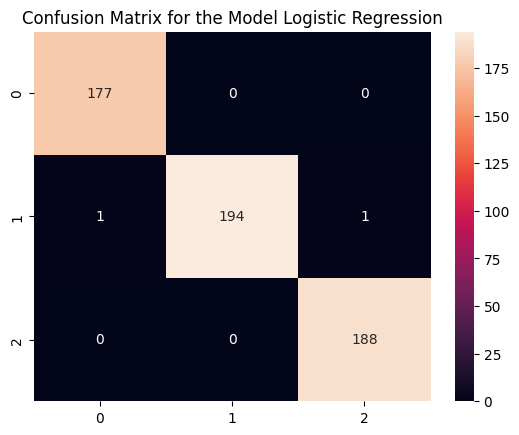

In [ ]:
# Ploting the confusion matrix
plt.title("Confusion Matrix for the Model Logistic Regression")
sns.heatmap(cm, annot=True,fmt='g')

#### Check the the Sensitivity and Specificity

In [ ]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9943820224719101
Specificity :  1.0


#### Check the the PPV nad NPV

In [ ]:
total=sum(sum(cm))

# this for Positive Predictive Value.
ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv : ', ppv )
# negative Predictive Value.
npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv : ', npv)

ppv :  1.0
npv :  0.9948717948717949


#### Check the metrics

In [ ]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
F1Score = f1_score(y_test, y_predict, average='micro')
print('F1 Score is : ', F1Score)

F1 Score is :  0.9964349376114082


In [ ]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2
RecallScore = recall_score(y_test, y_predict, average='micro')
print('Recall Score is : ', RecallScore)

Recall Score is :  0.9964349376114082


In [ ]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))
PrecisionScore = precision_score(y_test, y_predict, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9964349376114082


In [ ]:
#Calculating Precision recall Score
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_predict, average='micro')
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.9964349376114082, 0.9964349376114082, 0.9964349376114082, None)


In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_predict, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.0035650623885918


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_predict, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)



#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test,y_predict)
print('Median Squared Error Value is : ', MdSEValue )

Mean Squared Error Value is :  0.0035650623885918
Median Squared Error Value is :  0.0


# Using RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Check the model prediction
pred_RFC= classifier.predict(X_test)
print(pred_RFC[:10])

[1 1 1 2 2 0 2 0 0 2]


In [ ]:
# Check the score for the model
print('Model FRC Train Score is : ' , classifier.score(X_train, y_train))
print('Model RFC Test Score is : ' , classifier.score(X_test, y_test))

Model FRC Train Score is :  0.9995535714285714
Model RFC Test Score is :  0.9803921568627451


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,pred_RFC)

<Axes: title={'center': 'Confusion Matrix for the Model RandomForestClassifier'}>

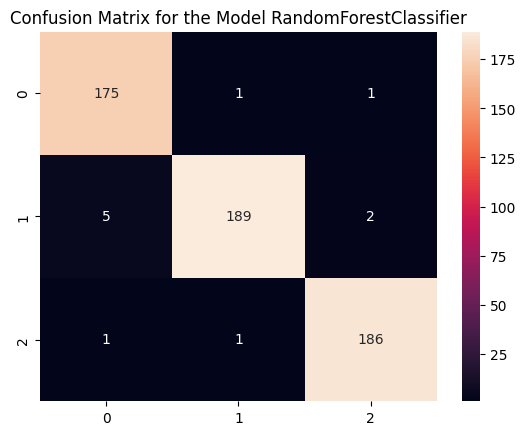

In [ ]:
# Ploting the confusion matrix
plt.title("Confusion Matrix for the Model RandomForestClassifier")
sns.heatmap(cm, annot=True,fmt='g')

In [ ]:

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9722222222222222
Specificity :  0.9947368421052631


In [ ]:
total=sum(sum(cm))

ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv : ', ppv )

npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv : ', npv)

ppv :  0.9943181818181818
npv :  0.9742268041237113


#### Check the metrices for the model

In [ ]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2
RecallScore = recall_score(y_test, pred_RFC, average='micro')
print('Recall Score is : ', RecallScore)

Recall Score is :  0.9803921568627451


In [ ]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))
PrecisionScore = precision_score(y_test, pred_RFC, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9803921568627451


In [ ]:
#Calculating Precision recall Score :
PrecisionRecallScore = precision_recall_fscore_support(y_test, pred_RFC, average='micro')
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.9803921568627451, 0.9803921568627451, 0.9803921568627451, None)


In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, pred_RFC, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.023172905525846704


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, pred_RFC, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)


#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test,pred_RFC)
print('Median Squared Error Value is : ', MdSEValue )

Mean Squared Error Value is :  0.030303030303030304
Median Squared Error Value is :  0.0


# Using DecisionTreeClassifier

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Check the model prediction
pred_DecisionTreeClassifier= classifier.predict(X_test)
print(pred_DecisionTreeClassifier[:10])

[1 1 1 2 2 0 2 0 0 2]


In [ ]:
# Check the score for the model
print('Model DecisionTreeClassifier Train Score is : ' , classifier.score(X_train, y_train))
print('Model DecisionTreeClassifier Test Score is : ' , classifier.score(X_test, y_test))

Model DecisionTreeClassifier Train Score is :  1.0
Model DecisionTreeClassifier Test Score is :  0.9786096256684492


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_predict)

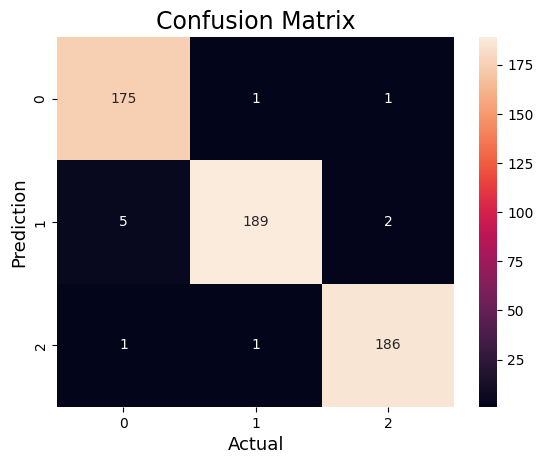

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9722222222222222
Specificity :  0.9947368421052631


In [ ]:
total=sum(sum(cm))

ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv : ', ppv )

npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv : ', npv)

ppv :  0.9943181818181818
npv :  0.9742268041237113


In [ ]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2
RecallScore = recall_score(y_test, pred_DecisionTreeClassifier, average='micro')
print('Recall Score is : ', RecallScore)

Recall Score is :  0.9786096256684492


In [ ]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))
PrecisionScore = precision_score(y_test, pred_DecisionTreeClassifier, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9786096256684492


In [ ]:
#Calculating Precision recall Score :
PrecisionRecallScore = precision_recall_fscore_support(y_test, pred_DecisionTreeClassifier, average='micro')
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.9786096256684492, 0.9786096256684492, 0.9786096256684492, None)


In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, pred_DecisionTreeClassifier, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.024955436720142603


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, pred_DecisionTreeClassifier, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)


#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test,pred_DecisionTreeClassifier)
print('Median Squared Error Value is : ', MdSEValue )

Mean Squared Error Value is :  0.03208556149732621
Median Squared Error Value is :  0.0


<h1>

```
Thanks
```
